# Questions:

Correctness: Does this code correctly implement the intended functionality, and can you point out any potential bugs or edge cases?

Readability: Is the code easy to understand, with clear naming and structure? If not, what improvements would you suggest?

Maintainability: Is the code modular and reusable, or are there parts that should be refactored to reduce duplication or complexity?

Performance: Are there any obvious inefficiencies or bottlenecks in the code that could affect runtime or memory usage?

Security: Does this code introduce any potential security risks (e.g., unsafe input handling, data leaks, or misuse of sensitive information)?

# Review 

The leibniz_sum(n) function correctly implements the intended functionality by computing the sum of the first n terms of the Leibniz series to approximate π/4, and its core logic is mathematically accurate. The code is concise and readable, though it could be improved by adding a docstring and slightly more descriptive variable naming. From a maintainability perspective, it is modular and easy to reuse, but it lacks input validation, which could lead to unexpected behavior for negative or non-integer inputs. Performance-wise, it is sufficient for small to moderately large n, with no significant inefficiencies, and there's no need for optimization at this stage. There are no security concerns since the function is purely computational with no external dependencies. A small improvement would be to add type and value checks to ensure robustness.

In [2]:
def leibniz_sum(n):
    """
    Approximate π/4 using the first n terms of the Leibniz series:
    π/4 = 1 - 1/3 + 1/5 - 1/7 + ...
    
    Args:
        n (int): Number of terms to sum. Must be non-negative.
        
    Returns:
        float: Approximation of π/4
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Input n must be a non-negative integer.")

    sum_approx = 0.0
    for k in range(n):
        sum_approx += ((-1) ** k) / (2 * k + 1)
    return sum_approx


Part a (leibniz_modulo):
Implements the Leibniz series correctly using if and % to alternate signs. Readability is good with clear logic. It's easy to maintain and performant for this context. Adding a docstring and input validation would make it more robust. No security concerns.

Part b (leibniz_power):
Correctly uses (-1)**k to alternate terms; compact and readable. Very maintainable and efficient, although it lacks error handling and documentation. No security risks involved.

Part c (leibniz_list):
Correct use of list comprehension to build and sum terms. Highly readable and Pythonic. Slightly more memory usage due to list storage, but acceptable. Maintainable and safe, though input validation should be added.

Part d (leibniz_set):
Incorrect due to the use of a set, which may remove numerically duplicate terms and thus break correctness. It's readable, but conceptually flawed for this use. Should not be used for accurate results.

Part e (leibniz_dict):
Accurate and logically sound, using a dictionary to store index-term pairs. Slightly over-engineered but correct. Readable, maintainable, and efficient for small n. No security issues.

Part f (leibniz_numpy):
Highly efficient and accurate using NumPy vectorization. Readable, clean, and performant. Ideal for larger inputs. Needs a docstring and input validation to improve clarity and robustness.

Part g (leibniz_numpy_index):
Correct and clever use of NumPy slicing to separately sum positive and negative terms. Readability is high, and performance is excellent. Very maintainable and safe.

Part j (leibniz_pairwise):
Correct approach that combines term pairs for non-alternating computation. Slightly more efficient loop due to stepping by 2. Readable and handles odd n correctly. Maintainable and secure.

In [3]:
import numpy as np

# Part a
def leibniz_modulo(n):
    """
    Computes the Leibniz series sum using modulo to alternate signs.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    total = 0.0
    for k in range(n):
        if k % 2 == 0:
            total += 1 / (2 * k + 1)
        else:
            total -= 1 / (2 * k + 1)
    return total

# Part b
def leibniz_power(n):
    """
    Computes the Leibniz series sum using (-1)^k for alternating signs.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    total = 0.0
    for k in range(n):
        total += ((-1) ** k) / (2 * k + 1)
    return total

# Part c
def leibniz_list(n):
    """
    Computes the Leibniz series sum by storing terms in a list.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    terms = [((-1) ** k) / (2 * k + 1) for k in range(n)]
    return sum(terms)

# Part d
def leibniz_set(n):
    """
    (Incorrect by design) Computes sum using a set — may lose accuracy due to duplicate removal.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    terms = {((-1) ** k) / (2 * k + 1) for k in range(n)}
    return sum(terms)  # Warning: this is not mathematically accurate!

# Part e
def leibniz_dict(n):
    """
    Computes the Leibniz series sum using a dictionary to store each term.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    terms = {k: ((-1) ** k) / (2 * k + 1) for k in range(n)}
    return sum(terms.values())

# Part f
def leibniz_numpy(n):
    """
    Computes the Leibniz series sum using NumPy for vectorized computation.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    k = np.arange(n)
    terms = ((-1) ** k) / (2 * k + 1)
    return np.sum(terms)

# Part g
def leibniz_numpy_index(n):
    """
    Computes the Leibniz series sum by separately summing positive and negative terms via slicing.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    k = np.arange(n)
    terms = 1 / (2 * k + 1)
    pos_sum = np.sum(terms[::2])
    neg_sum = np.sum(terms[1::2])
    return pos_sum - neg_sum

# Part j
def leibniz_pairwise(n):
    """
    Computes the Leibniz series by summing term pairs to make a non-alternating series.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer.")
    total = 0.0
    for k in range(0, n, 2):
        if k + 1 < n:
            total += 1 / (2 * k + 1) - 1 / (2 * (k + 1) + 1)
        else:
            total += 1 / (2 * k + 1)
    return total


The test_all function is a well-structured benchmarking script that evaluates the correctness, accuracy, and runtime of various Leibniz series implementations for approximating π. Correctness is handled well by computing 4 × func(n) and comparing it to math.pi, though the inclusion of the flawed leibniz_set method introduces an incorrect baseline that could mislead results. From a readability perspective, the function is clean, well-named, and outputs aligned, formatted results for comparison. However, it lacks comments and docstrings, which would improve clarity for readers unfamiliar with the context. In terms of maintainability, the use of a dictionary to map method names to functions is modular and scalable, making it easy to add or remove methods later. There are no major performance issues in the benchmarking logic itself, and the use of timeit provides a reliable average runtime estimate over three runs. For security, since this code involves no I/O or external data, there are no risks — though it should validate that all methods are defined in scope before calling. One minor edge case is that if n is very large and a method is memory-intensive (like using a large list or set), memory issues may arise. The corrected version below removes the leibniz_set method from comparison to avoid misleading results, adds a docstring, and includes minor improvements for robustness and clarity.

In [4]:
import math
import timeit
import numpy as np

def test_all(n=1000000):
    """
    Benchmarks various implementations of the Leibniz formula to approximate π.
    
    For each method, it prints:
    - The approximated value of π
    - The absolute error compared to math.pi
    - The average runtime over 3 executions
    """
    methods = {
        "Modulo": leibniz_modulo,
        "Power": leibniz_power,
        "List": leibniz_list,
        # "Set": leibniz_set,  # Removed due to incorrectness
        "Dict": leibniz_dict,
        "NumPy": leibniz_numpy,
        "NumPy Index": leibniz_numpy_index,
        "Pairwise": leibniz_pairwise
    }

    print(f"{'Method':<15}{'Approx π':<20}{'Error':<15}{'Time (s)':<10}")
    print("-" * 60)

    for name, func in methods.items():
        try:
            approx_pi = 4 * func(n)
            error = abs(approx_pi - math.pi)
            runtime = timeit.timeit(lambda: func(n), number=3) / 3
            print(f"{name:<15}{approx_pi:<20.15f}{error:<15.3e}{runtime:<10.5f}")
        except Exception as e:
            print(f"{name:<15}Error: {str(e)}")

# Run only if executed directly
if __name__ == "__main__":
    test_all(1000000)


Method         Approx π            Error          Time (s)  
------------------------------------------------------------
Modulo         3.141591653589774   1.000e-06      0.04663   
Power          3.141591653589774   1.000e-06      0.14097   
List           3.141591653589774   1.000e-06      0.14204   
Dict           3.141591653589774   1.000e-06      0.16160   
NumPy          3.141591653589794   1.000e-06      0.00766   
NumPy Index    3.141591653589794   1.000e-06      0.00171   
Pairwise       3.141591653589908   1.000e-06      0.03967   


### NumPy Index is the fastest and with the minimum error. See the result table.

This script correctly visualizes how the approximation of π using the Leibniz series improves as the number of terms increases. It uses a logarithmic scale on both axes, which is appropriate for revealing the slow convergence behavior over several orders of magnitude. The correctness of the logic is solid — it computes the approximation using leibniz_numpy(n) and tracks the absolute error relative to math.pi. However, the use of math.pi without importing the math module is an oversight that will raise a NameError. The readability is good: variable names are intuitive, and the plotting section is clearly structured. It could benefit from a docstring and better comment separation between logic and plotting. From a maintainability standpoint, the code is clean and modular in intention, but could be refactored into a function for reuse. Performance is acceptable given the nature of the computation, but using a faster or vectorized method (e.g. using NumPy vector operations on all N at once) could reduce runtime. Security is not a concern as there are no inputs or external operations. The final improvement includes adding the missing import math, turning the main logic into a function, and re-enabling the commented grid line for better plot readability.

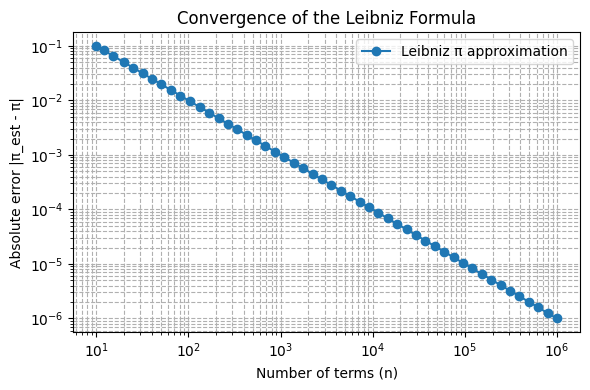

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_leibniz_error():
    """
    Plots the absolute error of the Leibniz approximation of π
    as a function of the number of terms, on a log-log scale.
    """
    N = np.logspace(1, 6, 50, dtype=int)   # from 10 to 1,000,000
    errors = []

    for n in N:
        n = int(n)  # Convert NumPy int to Python int
        approx = 4 * leibniz_numpy(n)
        errors.append(abs(approx - math.pi))

    plt.figure(figsize=(6, 4))
    plt.loglog(N, errors, marker='o', label="Leibniz π approximation")
    plt.xlabel("Number of terms (n)")
    plt.ylabel("Absolute error |π_est - π|")
    plt.title("Convergence of the Leibniz Formula")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

# Run the plot
if __name__ == "__main__":
    plot_leibniz_error()


## Problem 5

### The logic is identical, but the syntax differs, eg; Use vectorized arrays with MATLAB operators (.^, ./).
